In [21]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import matplotlib

# 1. View the first few lines of green and yellow taxi trip data

The original NYC taxi trip data is downloaded from https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

Here I decided to use data from year 2015 as it contains detailed geographic information about the pickup and dropoff locations of each trip. The `Yellow Taxi Trip Records` and `Green Taxi Trip Records` are saved in separate '.csv' files, one file for trip records in each month.

**Note**: files `green_tripdata_2015-01.csv` to `green_tripdata_2015-06.csv` (green taxi trip records from January to June) have double commas at the end of each line and need to be removed in `Unix shell` using `vi` with command `:%s/,,$//g` before being processed in Python.

Each `.csv` file is very large and before combining files to do analysis, we can first have a look at the first few lines of the monthly data.

In [3]:
base_dir = '/Volumes/Yuchen_Drive/2015_nyc_taxi'
## Instead of reading the entire file, only read 10000 rows first
taxi_green_df_1 = pd.read_csv(os.path.join(base_dir, 'green_tripdata_2015-01.csv'), nrows = 10000)
taxi_green_df_1.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-01-01 00:34:42,2015-01-01 00:38:34,N,1,-73.922592,40.754528,-73.913635,40.765522,1,...,5.0,0.5,0.5,0.0,0.0,NaN,0.3,6.3,2,1
1,2,2015-01-01 00:34:46,2015-01-01 00:47:23,N,1,-73.952751,40.677711,-73.981529,40.658978,1,...,12.0,0.5,0.5,0.0,0.0,NaN,0.3,13.3,2,1
2,1,2015-01-01 00:34:44,2015-01-01 00:38:15,N,1,-73.843010,40.719055,-73.846581,40.711567,1,...,5.0,0.5,0.5,1.8,0.0,NaN,0.0,7.8,1,1
3,2,2015-01-01 00:34:48,2015-01-01 00:38:08,N,1,-73.860825,40.757793,-73.854042,40.749821,1,...,5.0,0.5,0.5,0.0,0.0,NaN,0.3,6.3,2,1
4,2,2015-01-01 00:34:53,2015-01-01 01:09:10,N,1,-73.945183,40.783321,-73.989624,40.765450,1,...,24.5,0.5,0.5,0.0,0.0,NaN,0.3,25.8,2,1


In [28]:
## Instead of reading the entire file, only read 10000 rows first
taxi_yellow_df_1 = pd.read_csv(os.path.join(base_dir, 'yellow_tripdata_2015-01.csv'), nrows = 10000)
taxi_yellow_df_1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1,N,-73.974785,40.750618,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1,N,-73.994415,40.759109,1,14.5,0.5,0.5,2.00,0.0,0.3,17.80
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,1,N,-73.951820,40.824413,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,1,N,-74.004326,40.719986,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,1,N,-74.004181,40.742653,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30


In [31]:
print('Number of columns for green taxi tripdata: {}'.format(taxi_green_df_1.shape[1]))
print('Columns for green taxi tripdata: {}'.format(taxi_green_df_1.columns.values))
print('\n')
print('Number of columns for yellow taxi tripdata: {}'.format(taxi_yellow_df_1.shape[1]))
print('Columns for yellow taxi tripdata: {}'.format(taxi_yellow_df_1.columns.values))

Number of columns for green taxi tripdata: 21
Columns for green taxi tripdata: ['VendorID' 'lpep_pickup_datetime' 'Lpep_dropoff_datetime'
 'Store_and_fwd_flag' 'RateCodeID' 'Pickup_longitude' 'Pickup_latitude'
 'Dropoff_longitude' 'Dropoff_latitude' 'Passenger_count' 'Trip_distance'
 'Fare_amount' 'Extra' 'MTA_tax' 'Tip_amount' 'Tolls_amount' 'Ehail_fee'
 'improvement_surcharge' 'Total_amount' 'Payment_type' 'Trip_type ']


Number of columns for yellow taxi tripdata: 19
Columns for yellow taxi tripdata: ['VendorID' 'tpep_pickup_datetime' 'tpep_dropoff_datetime'
 'passenger_count' 'trip_distance' 'pickup_longitude' 'pickup_latitude'
 'RateCodeID' 'store_and_fwd_flag' 'dropoff_longitude' 'dropoff_latitude'
 'payment_type' 'fare_amount' 'extra' 'mta_tax' 'tip_amount'
 'tolls_amount' 'improvement_surcharge' 'total_amount']


### Short overview:
1.There are 12 separate csv files for green taxi trip data and yellow taxi trip data, respectively. The file size for green taxi trip data is around 240 MB/file and around 2 GB/file for yellow taxi trip data.

2.The green taxi trip data contains 21 columns and the yellow taxi trip data contains 19 columns. There is difference in column names between these two types of datasets though the columns correspond to the same type of information. To facilitate the downstream analysis process, it's better to rename the columns to the same.  

3.We can set up some filtering parameters to pre-process the files when combing the 12 csv files for each dataset based on the name of the columns:
   * `Passenger_count`/`passenger_count` > 0
   * `Trip_distance`/`trip_distance` > 0
   * `Fare_amount`/`fare_amount` > 0
   * `Total_amount`/`total_amount` > 0
    
Considering the large size of the dataset, I combine the csv files in cluster and compute some basic summary statistics for both green and yellow taxi trip data. The code used for combining, filtering and summarizing the datasets are shown as below:

# 2. Combine, pre-process and select 1000000 trip records from each dataset for analysis (cluster)

## 2.1 Green Taxi Trip Records -- pre-processing

In [ ]:
## Set up filepath and filenames
dirpath = "/data/chenge/xiey1/DataScience/NYC_taxi/nyc_taxi_green_2015"
outpath = "/data/chenge/xiey1/DataScience/NYC_taxi/nyc_taxi_green_2015_combine"
filename_combine = "nyc_taxi_green_2015_combine.csv"
filename_combine_filter = "nyc_taxi_green_2015_combine_filter.csv"
filenames = [file for file in os.listdir(dirpath) if os.path.isfile(os.path.join(dirpath, file))]
filedir = [os.path.join(dirpath, i) for i in filenames]
## Combine csv files
combined_csv = pd.concat([pd.read_csv(f, parse_dates=["lpep_pickup_datetime", "Lpep_dropoff_datetime"]) for f in filedir])
combined_csv['trip_ID'] = np.arange(combined_csv.shape[0])

In [ ]:
## Rename columns and output the combined csv file
combined_csv.rename(columns = {'lpep_pickup_datetime':'pickup_datetime', 'Lpep_dropoff_datetime':'dropoff_datetime', 'Pickup_longitude':'pickup_longitude', 'Pickup_latitude':'pickup_latitude', 'Dropoff_longitude': 'dropoff_longitude', 'Dropoff_latitude': 'dropoff_latitude', 'Passenger_count': 'passenger_count','Trip_distance':'trip_distance', 'Fare_amount': 'fare_amount', 'Total_amount': 'total_amount'}, inplace = True)
combined_csv.to_csv(os.path.join(outpath, filename_combine), index = False)

In [ ]:
## filter files and output the combined csv file after filtering
idx = (combined_csv.passenger_count > 0) & (combined_csv.trip_distance > 0) & (combined_csv.fare_amount > 0) & (combined_csv.total_amount > 0)
combined_csv = combined_csv[idx]
combined_csv.to_csv(os.path.join(outpath, filename_combine_filter), index = False)

## 2.2 Yellow Taxi Trip Records -- pre-processing

In [ ]:
## Set up filepath and filenames
dirpath = "/data/chenge/xiey1/DataScience/NYC_taxi/nyc_taxi_yellow_2015"
outpath = "/data/chenge/xiey1/DataScience/NYC_taxi/nyc_taxi_yellow_2015_combine"
filename_combine = "nyc_taxi_yellow_2015_combine.csv"
filename_combine_filter = "nyc_taxi_yellow_2015_combine_filter.csv"
filenames = [file for file in os.listdir(dirpath) if os.path.isfile(os.path.join(dirpath, file))]
filedir = [os.path.join(dirpath, i) for i in filenames]
## Combine csv files
combined_csv = pd.concat([pd.read_csv(f, parse_dates=["tpep_pickup_datetime", "tpep_dropoff_datetime"]) for f in filedir])
combined_csv['trip_ID'] = np.arange(combined_csv.shape[0])

In [ ]:
## Rename columns and output the combined csv file
combined_csv.rename(columns = {'tpep_pickup_datetime': 'pickup_datetime', 'tpep_dropoff_datetime':'dropoff_datetime'}, inplace = True)
combined_csv.to_csv(os.path.join(outpath, filename_combine), index = False)

In [ ]:
## filter files and output the combined csv file after filtering
idx = (combined_csv.passenger_count > 0) & (combined_csv.trip_distance > 0) & (combined_csv.fare_amount > 0) & (combined_csv.total_amount > 0)
combined_csv = combined_csv[idx]
combined_csv.to_csv(os.path.join(outpath, filename_combine_filter), index = False)

### Summary of file combining result:
1.Number of total trip records for NYC green taxt: **19233765**;

After filtering (passenger_count > 0, trip_distance > 0, fare_amount > 0, total_amount > 0): **18886623**

2.Number of total trip records for NYC yellow taxt: **146112989**;

After filtering (passenger_count > 0, trip_distance > 0, fare_amount > 0, total_amount > 0): **145084681**

The ratio of total trip number of NYC green and yellow taxi is around 1:7.7

## 2.3 Select 1000000 trip records for analysis

It's not possible to analyze such a big dataset in a local computer, while cluster is not very convenient for exploratory data analysis (EDA) purposes. Thus, I decide to randomly select 1000000 trip records from both green and yellow taxi datasets for exploratory data analysis.

In [ ]:
def select_s(file_name, s):
    with open(file_name, 'r') as f:
        n = sum(1 for line in f) - 1
    f.close()
    skip = sorted(random.sample(range(1,n+1),n-s))
    file_select = pd.read_csv(file_name, skiprows=skip, parse_dates=["pickup_datetime", "dropoff_datetime"])
    return file_select

In [ ]:
rown = 1000000
outpath = "/data/chenge/xiey1/DataScience/NYC_taxi/nyc_taxi_green_2015_combine"
filename_combine_filter = "nyc_taxi_green_2015_combine_filter.csv"
file_df= select_s(os.path.join(outpath, filename_combine_filter), rown)
file_df.to_csv(os.path.join(outpath, "nyc_taxi_green_2015_combine_1000000.csv"), index = False)

In [ ]:
rown = 1000000
outpath = "/data/chenge/xiey1/DataScience/NYC_taxi/nyc_taxi_yellow_2015_combine"
filename_combine_filter = "nyc_taxi_yellow_2015_combine_filter.csv"
file_df= select_s(os.path.join(outpath, filename_combine_filter), rown)
file_df.to_csv(os.path.join(outpath, "nyc_taxi_yellow_2015_combine_1000000.csv"), index = False)

# 3. Compute summary statistics for the data by `datetime` features (cluster)

In [ ]:
## Extract detailed datetime information such as year, weekday, hour, month, day_of_year, etc.
def datetime_info(df):
    df["year"] = df.pickup_datetime.apply(lambda x: x.year)
    df["weekday"] = df.pickup_datetime.apply(lambda x: x.weekday())
    df["hour"] = df.pickup_datetime.apply(lambda x: x.hour)
    df["month"] = df.pickup_datetime.apply(lambda x: x.month)
    df["day_of_year"] = df.pickup_datetime.apply(lambda x: x.timetuple().tm_yday)
    df["trip_duration_sec"] = (df.dropoff_datetime - df.pickup_datetime).astype('timedelta64[s]')
    return df

### Green Taxi Trip Records

In [ ]:
outpath = "/data/chenge/xiey1/DataScience/NYC_taxi/nyc_taxi_green_2015_combine"
filename_combine_filter = "nyc_taxi_green_2015_combine_filter.csv"
taxi_green_df = pd.read_csv(os.path.join(outpath, filename_combine_filter))

In [ ]:
taxi_green_df = datetime_info(taxi_green_df)

In [ ]:
trip_num_month = taxi_green_df['month'].value_counts().to_frame().reset_index().rename(columns = {'index':'month', 'month':'trip_num_per_month'})
trip_num_month.to_csv(os.path.join(outpath, "nyc_taxi_green_2015_combine_filter_month_tripnum.csv"), index = False)

In [ ]:
trip_num_weekday = taxi_green_df['weekday'].value_counts().to_frame().reset_index().rename(columns = {'index':'weekday', 'weekday':'trip_num_per_weekday'})
trip_num_weekday.to_csv(os.path.join(outpath, "nyc_taxi_green_2015_combine_filter_weekday_tripnum.csv"), index = False)

In [ ]:
trip_num_hour = taxi_green_df['hour'].value_counts().to_frame().reset_index().rename(columns = {'index':'hour', 'hour':'trip_num_per_hour'})
trip_num_hour.to_csv(os.path.join(outpath, "nyc_taxi_green_2015_combine_filter_hour_tripnum.csv"), index = False)

In [ ]:
trip_num_dayofyear = taxi_green_df['day_of_year'].value_counts().to_frame().reset_index().rename(columns = {'index':'day_of_year', 'day_of_year':'trip_num_per_dayofyear'})
trip_num_dayofyear.to_csv(os.path.join(outpath, "nyc_taxi_green_2015_combine_filter_dayofyear_tripnum.csv"), index = False)

### Yellow Taxi Trip Records

In [ ]:
outpath = "/data/chenge/xiey1/DataScience/NYC_taxi/nyc_taxi_yellow_2015_combine"
filename_combine_filter = "nyc_taxi_yellow_2015_combine_filter.csv"
taxi_yellow_df = pd.read_csv(os.path.join(outpath, filename_combine_filter))

In [ ]:
taxi_yellow_df = datetime_info(taxi_yellow_df)

In [ ]:
trip_num_month = taxi_yellow_df['month'].value_counts().to_frame().reset_index().rename(columns = {'index':'month', 'month':'trip_num_per_month'})
trip_num_month.to_csv(os.path.join(outpath, "nyc_taxi_yellow_2015_combine_filter_month_tripnum.csv"), index = False)

In [ ]:
trip_num_weekday = taxi_yellow_df['weekday'].value_counts().to_frame().reset_index().rename(columns = {'index':'weekday', 'weekday':'trip_num_per_weekday'})
trip_num_weekday.to_csv(os.path.join(outpath, "nyc_taxi_yellow_2015_combine_filter_weekday_tripnum.csv"), index = False)

In [ ]:
trip_num_hour = taxi_yellow_df['hour'].value_counts().to_frame().reset_index().rename(columns = {'index':'hour', 'hour':'trip_num_per_hour'})
trip_num_hour.to_csv(os.path.join(outpath, "nyc_taxi_yellow_2015_combine_filter_hour_tripnum.csv"), index = False)

In [ ]:
trip_num_dayofyear = taxi_yellow_df['day_of_year'].value_counts().to_frame().reset_index().rename(columns = {'index':'day_of_year', 'day_of_year':'trip_num_per_dayofyear'})
trip_num_dayofyear.to_csv(os.path.join(outpath, "nyc_taxi_yellow_2015_combine_filter_dayofyear_tripnum.csv"), index = False)

# 4. Visualize the temporal patterns of the summarized total trip numbers

## 4.1 Trip number -- day_of_year

In [4]:
taxi_green_dayofyear = pd.read_csv('summary/nyc_taxi_green_2015_combine_filter_dayofyear_tripnum.csv').sort_values(by = 'day_of_year', ascending = True).rename(columns={'trip_num_per_dayofyear':'tripnum_day_green'})
taxi_yellow_dayofyear = pd.read_csv('summary/nyc_taxi_yellow_2015_combine_filter_dayofyear_tripnum.csv').sort_values(by = 'day_of_year', ascending = True).rename(columns={'trip_num_per_dayofyear':'tripnum_day_yellow'})
taxi_dayofyear = taxi_green_dayofyear.merge(taxi_yellow_dayofyear, left_on = 'day_of_year', right_on = 'day_of_year')

In [5]:
taxi_dayofyear.head()

,day_of_year,tripnum_day_green,tripnum_day_yellow
0,1,61891,378909
1,2,42294,343045
2,3,52914,404350
3,4,40893,326499
4,5,40955,360630


In [6]:
taxi_dayofyear.describe()

,day_of_year,tripnum_day_green,tripnum_day_yellow
count,365.000000,365.000000,365.000000
mean,183.000000,51744.172603,397492.276712
std,105.510663,9645.389234,51310.858855
min,1.000000,15077.000000,134792.000000
25%,92.000000,44036.000000,371827.000000
50%,183.000000,50242.000000,398382.000000
75%,274.000000,58331.000000,430782.000000
max,365.000000,80272.000000,516510.000000


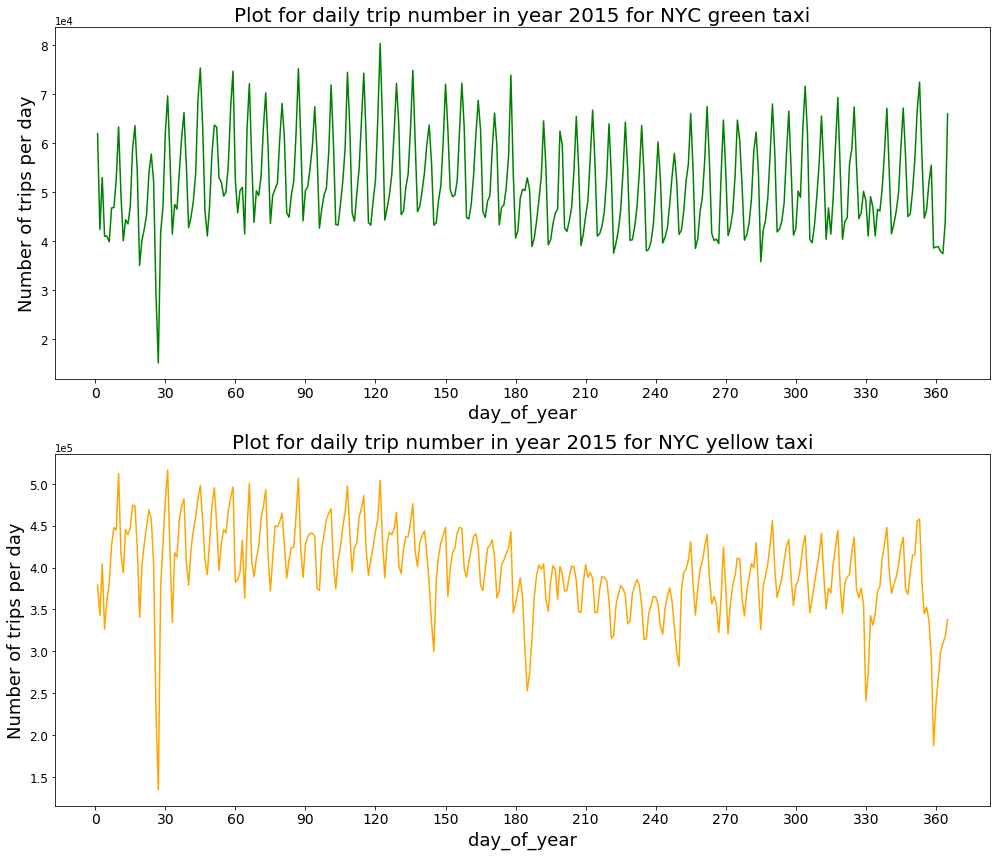

In [58]:
colors = ['green', 'orange']
taxi = ['green', 'yellow']
fig = plt.figure(figsize = (14,12))
for i in np.arange(2):
    plt.subplot(2,1,i+1)
    plt.plot(taxi_dayofyear.day_of_year, taxi_dayofyear.iloc[:,i+1], color = colors[i])
    plt.xlabel('day_of_year', fontsize = 18)
    plt.ylabel('Number of trips per day', fontsize = 18)
    plt.xticks(np.arange(0,365, 30),fontsize=14)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.yticks(size=12)
    plt.title('Plot for daily trip number in year 2015 for NYC {} taxi'.format(taxi[i]), fontsize = 20)
fig.tight_layout()

In [9]:
max_id = taxi_dayofyear['tripnum_day_green'].values.argmax()
min_id = taxi_dayofyear['tripnum_day_green'].values.argmin()
max_day = taxi_dayofyear.iloc[max_id,]['day_of_year']
min_day = taxi_dayofyear.iloc[min_id,]['day_of_year']
max_date = datetime.datetime(2015, 1, 1) + datetime.timedelta(int(max_day) - 1)
min_date = datetime.datetime(2015, 1, 1) + datetime.timedelta(int(min_day) - 1)
max_tripnum = taxi_dayofyear['tripnum_day_green'].values.max()
min_tripnum = taxi_dayofyear['tripnum_day_green'].values.min()

print('Date {} of year 2015 has the highest trip number for NYC green taxi: {}'.format(max_date.strftime("%m/%d"), max_tripnum))
print('Date {} of year 2015 has the lowest trip number for NYC green taxi: {}'.format(min_date.strftime("%m/%d"), min_tripnum))

Date 05/02 of year 2015 has the highest trip number for NYC green taxi: 80272
Date 01/27 of year 2015 has the lowest trip number for NYC green taxi: 15077


In [10]:
max_id = taxi_dayofyear['tripnum_day_yellow'].values.argmax()
min_id = taxi_dayofyear['tripnum_day_yellow'].values.argmin()
max_day = taxi_dayofyear.iloc[max_id,]['day_of_year']
min_day = taxi_dayofyear.iloc[min_id,]['day_of_year']
max_date = datetime.datetime(2015, 1, 1) + datetime.timedelta(int(max_day) - 1)
min_date = datetime.datetime(2015, 1, 1) + datetime.timedelta(int(min_day) - 1)
max_tripnum = taxi_dayofyear['tripnum_day_yellow'].values.max()
min_tripnum = taxi_dayofyear['tripnum_day_yellow'].values.min()

print('Date {} of year 2015 has the highest trip number for NYC yellow taxi: {}'.format(max_date.strftime("%m/%d"), max_tripnum))
print('Date {} of year 2015 has the lowest trip number for NYC yellow taxi: {}'.format(min_date.strftime("%m/%d"), min_tripnum))

Date 01/31 of year 2015 has the highest trip number for NYC yellow taxi: 516510
Date 01/27 of year 2015 has the lowest trip number for NYC yellow taxi: 134792


**Question**: What happend on 01/27/2015?
### The Blizzard of January 26-27, 2015
reference: https://www.weather.gov/okx/Blizzard_01262715
<img src="https://www.weather.gov/images/okx/Blizzard_01262715//header.png" width=600px>

To better compare the fluctuating pattern of daily trip numbers for green and yellow taxi, the daily trip number is normalized by the total trip number for each dataset and plotted together.

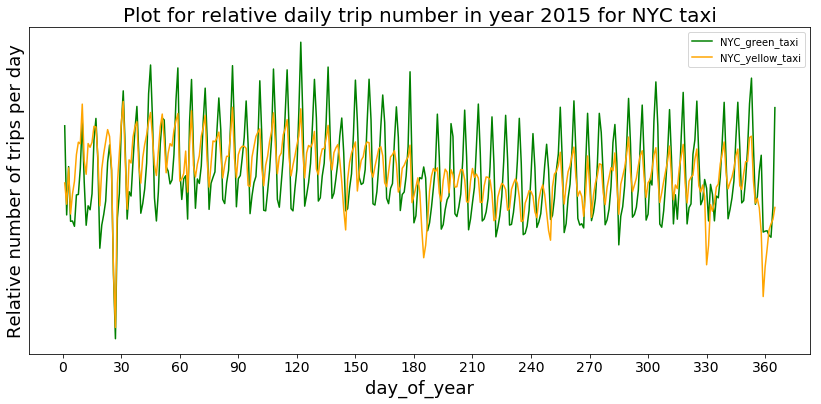

In [39]:
colors = ['green', 'orange']
fig = plt.figure(figsize = (14,6))
plt.plot(taxi_dayofyear.day_of_year, taxi_dayofyear.tripnum_day_green/taxi_dayofyear.tripnum_day_green.sum(), color = colors[0], label='NYC_green_taxi')
plt.plot(taxi_dayofyear.day_of_year, taxi_dayofyear.tripnum_day_yellow/taxi_dayofyear.tripnum_day_yellow.sum(), color = colors[1], label='NYC_yellow_taxi')
plt.xlabel('day_of_year', fontsize = 18)
plt.ylabel('Relative number of trips per day', fontsize = 18)
plt.xticks(np.arange(0,365, 30), fontsize=14)
plt.yticks([])
plt.title('Plot for relative daily trip number in year 2015 for NYC taxi', fontsize = 20)
plt.legend()

Text(0.5, 1.0, 'Correlation of daily trip number for \ngreen and yellow NYC taxi in year 2015')

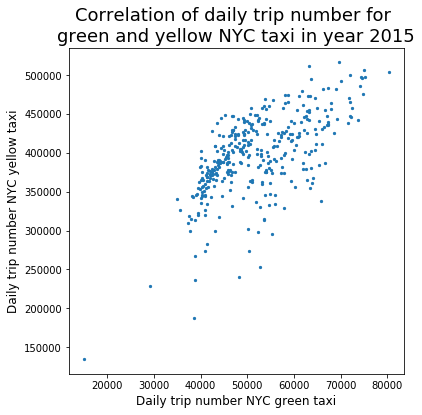

In [12]:
fig = plt.figure(figsize = (6,6))
plt.scatter(taxi_dayofyear.tripnum_day_green, taxi_dayofyear.tripnum_day_yellow, s = 5)
plt.xlabel('Daily trip number NYC green taxi', fontsize = 12)
plt.ylabel('Daily trip number NYC yellow taxi', fontsize = 12)
plt.title('Correlation of daily trip number for \ngreen and yellow NYC taxi in year 2015', fontsize = 18)

The daily trip number for both green and yellow taxi fluctuates throughout year 2015 in a periodic pattern at intervals of approximately 4 cycles per month. This leads to the hypothesis that the fluctuating pattern of daily trip number depends on day of the week. In addition, green taxi has larger variation in daily trip number compared to yellow taxi during each cycle. 

Next, I will further explore this pattern by analyzing the trip number per day_of_week. 

## 4.2 Trip number -- day_of_week

In [15]:
taxi_green_weekday = pd.read_csv('summary/nyc_taxi_green_2015_combine_filter_weekday_tripnum.csv').sort_values(by = 'weekday', ascending = True).rename(columns={'trip_num_per_weekday':'tripnum_weekday_green'})
taxi_yellow_weekday = pd.read_csv('summary/nyc_taxi_yellow_2015_combine_filter_weekday_tripnum.csv').sort_values(by = 'weekday', ascending = True).rename(columns={'trip_num_per_weekday':'tripnum_weekday_yellow'})
taxi_weekday = taxi_green_weekday.merge(taxi_yellow_weekday, left_on = 'weekday', right_on = 'weekday')

In [16]:
taxi_weekday.head()

,weekday,tripnum_weekday_green,tripnum_weekday_yellow
0,0,2180766,18535210
1,1,2246156,19992532
2,2,2415063,20931567
3,3,2687778,21710455
4,4,2999474,21812774


In [17]:
taxi_weekday.describe()

,weekday,tripnum_weekday_green,tripnum_weekday_yellow
count,7.000000,7.000000e+00,7.000000e+00
mean,3.000000,2.698089e+06,2.072638e+07
std,2.160247,4.561317e+05,1.395395e+06
min,0.000000,2.180766e+06,1.853521e+07
25%,1.500000,2.330610e+06,1.981989e+07
50%,3.000000,2.687778e+06,2.093157e+07
75%,4.500000,2.955168e+06,2.176161e+07
max,6.000000,3.446524e+06,2.245489e+07


In [ ]:
weekday_dict = {1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun', 0:'Mon'}

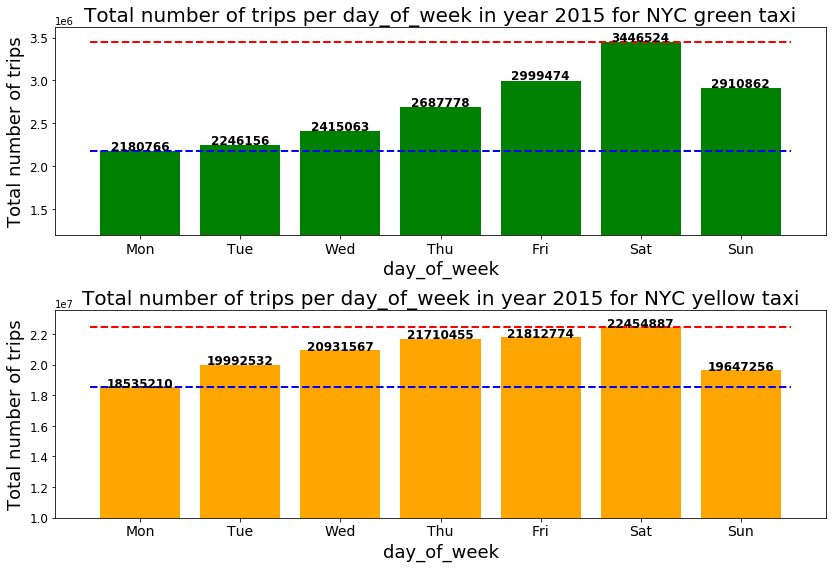

In [44]:
colors = ['green', 'orange']
taxi = ['green', 'yellow']
y_min = [1200000, 10000000]
fig = plt.figure(figsize = (12,8))
for i in np.arange(2):
    ax = fig.add_subplot(2,1,i+1)
    plt.bar(taxi_weekday.weekday, taxi_weekday.iloc[:,i+1], color = colors[i])
    plt.xlabel('day_of_week', fontsize = 18)
    plt.ylabel('Total number of trips', fontsize = 18)
    plt.xticks(np.arange(7), ('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'), size=14)
    #ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.yticks(size=12)
    plt.ylim(y_min[i])
    for n, v in enumerate(taxi_weekday.iloc[:,i+1]):
        ax.text(n, v + 10000, str(v), fontweight='bold', fontsize=12, ha = 'center')
    ax.plot([-0.5, 6.5], [taxi_weekday.iloc[:,i+1].min(), taxi_weekday.iloc[:,i+1].min()], "k--", linewidth=2, color = 'blue')
    ax.plot([-0.5, 6.5], [taxi_weekday.iloc[:,i+1].max(), taxi_weekday.iloc[:,i+1].max()], "k--", linewidth=2, color = 'red')
    plt.title('Total number of trips per day_of_week in year 2015 for NYC {} taxi'.format(taxi[i]), fontsize = 20)
    
fig.tight_layout()

The NYC taxi trip number varies across each day of week, and the pattern partially supports our hypothesis in **section 4.1**. Overall, trip number reaches peak on Saturday and returns to lowest level on Monday for both green and yellow taxi. In addition, green taxi has larger relative variation of trip number with 3446524 trips on Saturday, which is more than 50% increase compared to Monday with 2180766 trips.

Trip number for yellow taxi remains relatively constant with 22454887 trips on Saturday, a subtle increase compared to 18535210 trips on Monday. This is also consistent with the difference in variation patterns observed across day of year observed in **section 4.1**.

## 4.3 Trip number -- hour

In [34]:
taxi_green_hour = pd.read_csv('summary/nyc_taxi_green_2015_combine_filter_hour_tripnum.csv').sort_values(by = 'hour', ascending = True).rename(columns={'trip_num_per_hour':'tripnum_hour_green'})
taxi_yellow_hour = pd.read_csv('summary/nyc_taxi_yellow_2015_combine_filter_hour_tripnum.csv').sort_values(by = 'hour', ascending = True).rename(columns={'trip_num_per_hour':'tripnum_hour_yellow'})
taxi_hour = taxi_green_hour.merge(taxi_yellow_hour, left_on = 'hour', right_on = 'hour')

In [35]:
taxi_hour.head()

,hour,tripnum_hour_green,tripnum_hour_yellow
0,0,871027,5542249
1,1,696580,4087627
2,2,518694,2997586
3,3,399265,2179307
4,4,328364,1621467


In [36]:
taxi_hour.describe()

,hour,tripnum_hour_green,tripnum_hour_yellow
count,24.000000,2.400000e+01,2.400000e+01
mean,11.500000,7.869426e+05,6.045195e+06
std,7.071068,3.048839e+05,2.261193e+06
min,0.000000,2.121480e+05,1.508202e+06
25%,5.750000,6.521085e+05,5.053800e+06
50%,11.500000,7.459770e+05,6.777692e+06
75%,17.250000,1.030187e+06,7.294503e+06
max,23.000000,1.249138e+06,8.969629e+06


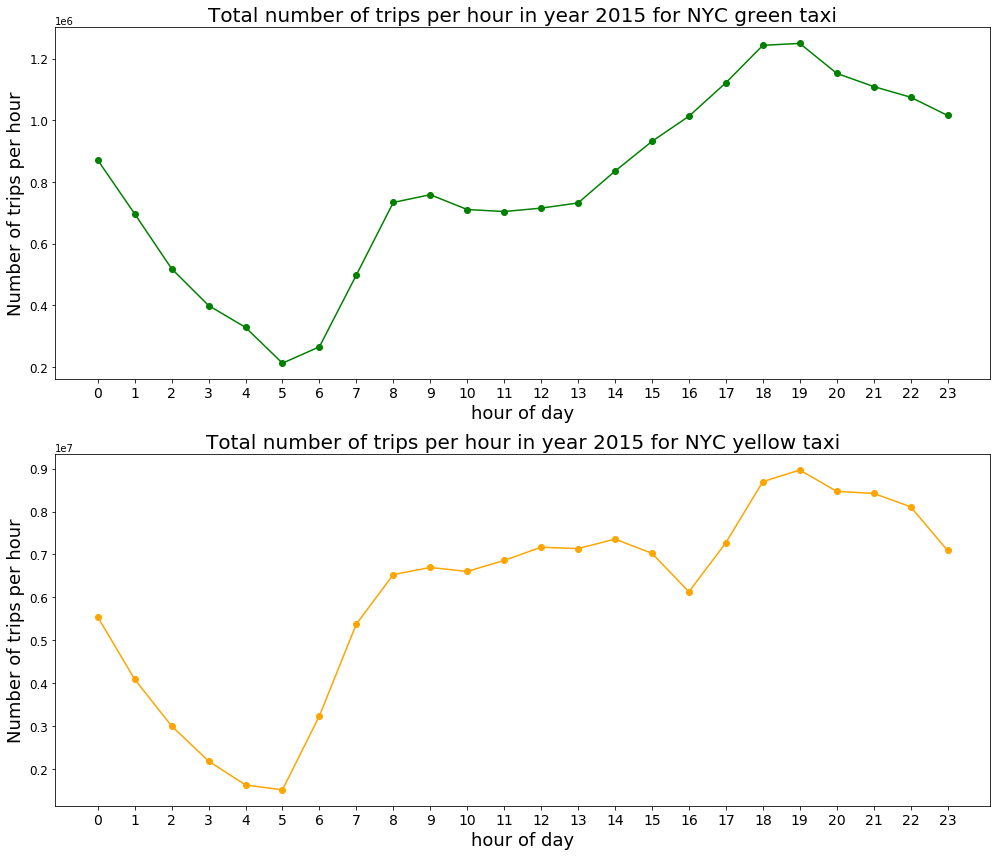

In [45]:
colors = ['green', 'orange']
taxi = ['green', 'yellow']
fig = plt.figure(figsize = (14,12))
for i in np.arange(2):
    plt.subplot(2,1,i+1)
    plt.plot(taxi_hour.hour, taxi_hour.iloc[:,i+1], color = colors[i], marker='o')
    plt.xlabel('hour of day', fontsize = 18)
    plt.ylabel('Number of trips per hour', fontsize = 18)
    plt.xticks(np.arange(0,24), size=14)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.yticks(size=12)
    plt.title('Total number of trips per hour in year 2015 for NYC {} taxi'.format(taxi[i]), fontsize = 20)
fig.tight_layout()

In [46]:
max_id = taxi_hour['tripnum_hour_green'].values.argmax()
min_id = taxi_hour['tripnum_hour_green'].values.argmin()
max_hour = taxi_hour.iloc[max_id,]['hour']
min_hour = taxi_hour.iloc[min_id,]['hour']
max_tripnum = taxi_hour['tripnum_hour_green'].values.max()
min_tripnum = taxi_hour['tripnum_hour_green'].values.min()

print('Hour {} in year 2015 has the highest trip number for NYC green taxi: {}'.format(max_hour, max_tripnum))
print('Hour {} in year 2015 has the lowest trip number for NYC green taxi: {}'.format(min_hour, min_tripnum))

Hour 19 in year 2015 has the highest trip number for NYC green taxi: 1249138
Hour 5 in year 2015 has the lowest trip number for NYC green taxi: 212148


In [47]:
max_id = taxi_hour['tripnum_hour_yellow'].values.argmax()
min_id = taxi_hour['tripnum_hour_yellow'].values.argmin()
max_hour = taxi_hour.iloc[max_id,]['hour']
min_hour = taxi_hour.iloc[min_id,]['hour']
max_tripnum = taxi_hour['tripnum_hour_yellow'].values.max()
min_tripnum = taxi_hour['tripnum_hour_yellow'].values.min()

print('Hour {} in year 2015 has the highest trip number for NYC yellow taxi: {}'.format(max_hour, max_tripnum))
print('Hour {} in year 2015 has the lowest trip number for NYC yellow taxi: {}'.format(min_hour, min_tripnum))

Hour 19 in year 2015 has the highest trip number for NYC yellow taxi: 8969629
Hour 5 in year 2015 has the lowest trip number for NYC yellow taxi: 1508202


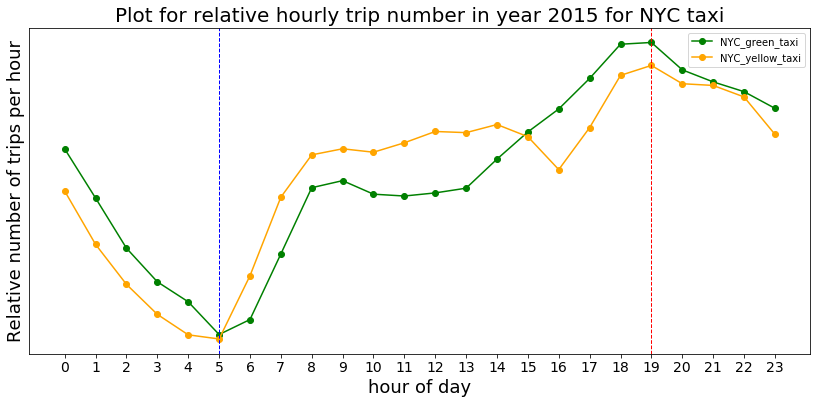

In [48]:
colors = ['green', 'orange']
fig = plt.figure(figsize = (14,6))
plt.plot(taxi_hour.hour, taxi_hour.tripnum_hour_green/taxi_hour.tripnum_hour_green.sum(), color = colors[0], marker='o', label='NYC_green_taxi')
plt.plot(taxi_hour.hour, taxi_hour.tripnum_hour_yellow/taxi_hour.tripnum_hour_yellow.sum(), color = colors[1], marker='o', label='NYC_yellow_taxi')
plt.xlabel('hour of day', fontsize = 18)
plt.ylabel('Relative number of trips per hour', fontsize = 18)
plt.xticks(np.arange(0,24), size=14)
plt.yticks([])
plt.axvline(x=5, ls='--', linewidth=1, color = 'blue')
plt.axvline(x=19, ls='--', linewidth=1, color = 'red')
plt.title('Plot for relative hourly trip number in year 2015 for NYC taxi', fontsize = 20)
plt.legend()

The hourly trip number varies significantly throughout the day and both green and yellow taxi exhibit a similar changing trend. Generally, the trip number reaches the lowest point at 5 am in the morning and starts to quickly ascent until 8 am (when most people start to go to work). The trip number keeps relatively constant from 9 am to 4 pm (1 pm for green taxi) and then starts to climb again until 7 pm. The evening peak at 6-7 pm is likely due to the rush hour of people getting off work (either heading home or other places). After 7 pm, the hourly trip number starts to descent and plunges after 1 am until reaches the lowest point at 5 am. The dynamic temporal pattern of hourly trip number largely reflects people's daily activity.

## 4.4 Trip number -- month

In [49]:
taxi_green_month = pd.read_csv('summary/nyc_taxi_green_2015_combine_filter_month_tripnum.csv').sort_values(by = 'month', ascending = True).rename(columns={'trip_num_per_month':'tripnum_month_green'})
taxi_yellow_month = pd.read_csv('summary/nyc_taxi_yellow_2015_combine_filter_month_tripnum.csv').sort_values(by = 'month', ascending = True).rename(columns={'trip_num_per_month':'tripnum_month_yellow'})
taxi_month = taxi_green_month.merge(taxi_yellow_month, left_on = 'month', right_on = 'month')

In [50]:
taxi_month.head()

,month,tripnum_month_green,tripnum_month_yellow
0,1,1479515,12658405
1,2,1546367,12360668
2,3,1689729,13251013
3,4,1632844,12977297
4,5,1753574,13068388


In [51]:
taxi_month.describe()

,month,tripnum_month_green,tripnum_month_yellow
count,12.000000,1.200000e+01,1.200000e+01
mean,6.500000,1.573885e+06,1.209039e+07
std,3.605551,8.799829e+04,8.035245e+05
min,1.000000,1.468635e+06,1.105254e+07
25%,3.750000,1.505314e+06,1.134443e+07
50%,6.500000,1.563278e+06,1.223568e+07
75%,9.250000,1.615331e+06,1.273813e+07
max,12.000000,1.753574e+06,1.325101e+07


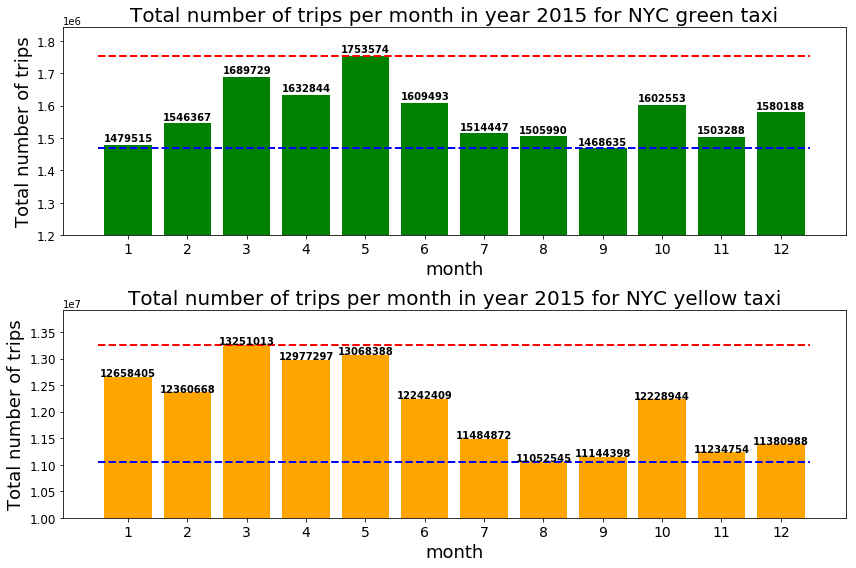

In [53]:
colors = ['green', 'orange']
taxi = ['green', 'yellow']
y_min = [1200000, 10000000]
fig = plt.figure(figsize = (12,8))
for i in np.arange(2):
    ax = fig.add_subplot(2,1,i+1)
    plt.bar(taxi_month.month, taxi_month.iloc[:,i+1], color = colors[i])
    plt.xlabel('month', fontsize = 18)
    plt.ylabel('Total number of trips', fontsize = 18)
    plt.xticks(np.arange(0,12)+1, size=14)
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.yticks(size=12)
    plt.ylim(y_min[i])
    for n, v in enumerate(taxi_month.iloc[:,i+1]):
        ax.text(n+1, v + 10000, str(v), fontweight='bold', fontsize=10, ha = 'center')
    ax.plot([0.5, 12.5], [taxi_month.iloc[:,i+1].min(), taxi_month.iloc[:,i+1].min()], "k--", linewidth=2, color = 'blue')
    ax.plot([0.5, 12.5], [taxi_month.iloc[:,i+1].max(), taxi_month.iloc[:,i+1].max()], "k--", linewidth=2, color = 'red')
    plt.title('Total number of trips per month in year 2015 for NYC {} taxi'.format(taxi[i]), fontsize = 20)
    
fig.tight_layout()

Overall, March, April and May are the months with the highest total trip number for both NYC green and yellow taxi. This might be due to the improved weather conditions since the winter season so that people can have more outdoor activites. The spring break also provides more opportunities for tourism.

The trip number plunges since May and hits the bottom in August and September. One possible explanation is the expanding business of Uber.

reference: https://www.amny.com/transit/manhattan-taxi-trips-plunge-almost-4-million-in-3-months-analysis-1.10984180

# 5. Summary

Here by exploring the summary data of total trip number per day of year, per day of week, per hour of day and per month for both NYC green and yellow taxi data, we have observed the following temporal patterns of NYC taxi business:

1.There is a total number of **19233765** trip records for NYC green taxi and **146112989** trip records for NYC yellow taxi in year 2015. Overall, the NYC yellow taxi carries more trips than green taxi with a ratio of total trip number around 7.7:1.
   
2.Overall, the temporal dynamics are shared between NYC green and yellow taxi for total trip number summarized by day of year, day of week, hour of day and month.   

3.The daily trip number (based on trip number summarized by day_of_year) fluctuates in a periodic manner at an interval of 7 days. Combined with data summarized by day of week, I hypothesize that the fluctuation pattern depends on day of the week which reaches peak on Saturday and bottom on Monday.
     
4.The daily trip number for green taxi has larger fluctuation range compared to that for yellow taxi.
     
5.The changes in hourly trip number throughout a day largely reflects people's activity with the lowest trip number at 5 am and highest trip number at 6-7 pm.
    
However, all the analysis is based on the total number of trips grouped by different `datetime` categories. In order to have a better understanding of the NYC taxi data, I will focus on the 1000000 trip records randomly selected from the big dataset.